# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
#Load main dataset and produce list of most commonly occuring countries for exercise #1

bank_data = pd.read_json('data/world_bank_projects.json')
most_freq_borrowers = bank_data.groupby('countryshortname').size().sort_values(ascending=False).head(10)
most_freq_borrowers

countryshortname
Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Mozambique            11
Africa                11
dtype: int64

In [9]:
# Visualize the most frequent borrowers in a bar graph

most_freq_borrowers = most_freq_borrowers.rename({'Yemen, Republic of': 'Yemen'})
borrow_graph = most_freq_borrowers.plot(kind='bar', ylim=[0, 20])
borrow_graph.set_ylabel('# of projects')
borrow_graph.set_xlabel('country')
borrow_graph

In [10]:
#Preview data of interest to exercise #2

bank_data['mjtheme_namecode']

0      [{u'code': u'8', u'name': u'Human development'...
1      [{u'code': u'1', u'name': u'Economic managemen...
2      [{u'code': u'5', u'name': u'Trade and integrat...
3      [{u'code': u'7', u'name': u'Social dev/gender/...
4      [{u'code': u'5', u'name': u'Trade and integrat...
5      [{u'code': u'6', u'name': u'Social protection ...
6      [{u'code': u'2', u'name': u'Public sector gove...
7      [{u'code': u'11', u'name': u'Environment and n...
8      [{u'code': u'10', u'name': u'Rural development...
9      [{u'code': u'2', u'name': u'Public sector gove...
10     [{u'code': u'10', u'name': u'Rural development...
11     [{u'code': u'10', u'name': u'Rural development...
12                       [{u'code': u'4', u'name': u''}]
13     [{u'code': u'5', u'name': u'Trade and integrat...
14     [{u'code': u'6', u'name': u'Social protection ...
15     [{u'code': u'10', u'name': u'Rural development...
16     [{u'code': u'10', u'name': u'Rural development...
17     [{u'code': u'8', u'name'

In [11]:
#View a more 'zoomed in' preview of the data for Exercise #2

for row in range(1,500):
    print(json_normalize(bank_data['mjtheme_namecode'][row]))

  code                                   name
0    1                    Economic management
1    6  Social protection and risk management
  code                                          name
0    5                         Trade and integration
1    2                      Public sector governance
2   11  Environment and natural resources management
3    6         Social protection and risk management
  code                         name
0    7  Social dev/gender/inclusion
1    7  Social dev/gender/inclusion
  code                                      name
0    5                     Trade and integration
1    4  Financial and private sector development
  code                                   name
0    6  Social protection and risk management
1    6                                       
  code                                      name
0    2                  Public sector governance
1    4  Financial and private sector development
  code                                          name
0   

  code                         name
0    1          Economic management
1    7  Social dev/gender/inclusion
  code                      name
0    5     Trade and integration
1    2  Public sector governance
2    2  Public sector governance
3    8         Human development
  code               name
0    8  Human development
1    4                   
  code                      name
0    2  Public sector governance
1    6                          
  code name
0   11     
  code                      name
0    2  Public sector governance
1    4                          
  code                         name
0    7  Social dev/gender/inclusion
1    8            Human development
2    8            Human development
  code               name
0    8  Human development
1    8                   
  code                                      name
0    4  Financial and private sector development
1   11                                          
  code                                          name
0   1

  code                                      name
0    5                     Trade and integration
1    4  Financial and private sector development
  code                      name
0    2  Public sector governance
1    8         Human development
2    2  Public sector governance
  code                         name
0    7  Social dev/gender/inclusion
1    3                             
  code                                      name
0    4  Financial and private sector development
1    6     Social protection and risk management
2    2                  Public sector governance
3    1                       Economic management
  code                                   name
0    5                  Trade and integration
1    6  Social protection and risk management
2    2               Public sector governance
3    2               Public sector governance
  code                                          name
0    2                      Public sector governance
1   11  Environment and natural 

  code               name
0   10  Rural development
1   10  Rural development
2   10  Rural development
3   10  Rural development
4   10  Rural development
  code                                   name
0    7            Social dev/gender/inclusion
1   10                      Rural development
2   10                      Rural development
3    6  Social protection and risk management
  code               name
0    8  Human development
1    8  Human development
2    8  Human development
3    8  Human development
  code                                          name
0    4      Financial and private sector development
1   11  Environment and natural resources management
  code               name
0   10  Rural development
1   10  Rural development
2   10  Rural development
3   10  Rural development
  code                                   name
0    2               Public sector governance
1    8                      Human development
2    5                  Trade and integration
3    2     

  code                                          name
0   11  Environment and natural resources management
1    7                   Social dev/gender/inclusion
2   10                             Rural development
3   11  Environment and natural resources management
4   11  Environment and natural resources management
  code               name
0    8  Human development
1    8                   
  code                                          name
0   11  Environment and natural resources management
1    6         Social protection and risk management
2    6         Social protection and risk management
3   11  Environment and natural resources management
4   11  Environment and natural resources management
  code                                   name
0    6  Social protection and risk management
1    8                      Human development
2    2               Public sector governance
3    1                    Economic management
  code                                          name
0  

  code                                      name
0    6     Social protection and risk management
1    4  Financial and private sector development
2    7               Social dev/gender/inclusion
3    7               Social dev/gender/inclusion
  code                                   name
0    7            Social dev/gender/inclusion
1    2               Public sector governance
2    6  Social protection and risk management
3    6  Social protection and risk management
4    2               Public sector governance
  code                                      name
0    4  Financial and private sector development
1    7               Social dev/gender/inclusion
2    4  Financial and private sector development
3    4  Financial and private sector development
  code                                          name
0   10                             Rural development
1   11  Environment and natural resources management
  code                         name
0    7  Social dev/gender/inclusion
1  

3    6  Social protection and risk management
  code                                          name
0   11  Environment and natural resources management
1   10                             Rural development
2   10                             Rural development
3   11  Environment and natural resources management
  code                      name
0    8         Human development
1    2  Public sector governance
2    2  Public sector governance
3    8         Human development
  code                                   name
0    9                      Urban development
1    6  Social protection and risk management
2    6  Social protection and risk management
3    9                      Urban development
  code                      name
0    2  Public sector governance
1    2  Public sector governance
  code               name
0   10  Rural development
1   11                   
  code                         name
0    8            Human development
1    7  Social dev/gender/inclusion
  code   

In [12]:
# Make a dictionary to count occurences of major theme codes for Exercise #2

theme_dict = {}
for row in range(1, 500):
    item = json_normalize(bank_data['mjtheme_namecode'][row])
    for entry in item['code']:
        if entry in theme_dict:
            theme_dict[entry] = theme_dict[entry] + 1
        else:
            theme_dict[entry] = 1
theme_dict


{u'1': 38,
 u'10': 216,
 u'11': 249,
 u'2': 199,
 u'3': 15,
 u'4': 146,
 u'5': 77,
 u'6': 168,
 u'7': 130,
 u'8': 209,
 u'9': 50}

In [13]:
# Sort dictionary to find the 10 most frequent major theme codes for Exercise #2

theme_ranking = pd.DataFrame(theme_dict, index=['Frequency'])
theme_ranking = theme_ranking.transpose().sort_values('Frequency', ascending=False).head(10)
theme_ranking.index.name = 'Major Theme Code'
theme_ranking

,Frequency
Major Theme Code,
11,249
10,216
8,209
2,199
6,168
4,146
7,130
5,77
9,50


In [14]:
# Build a decoder dictionary for Exercise #3 that tells you the name associated with each major theme code
decoder = {}
for row in range(1, 500):
    item = json_normalize(bank_data['mjtheme_namecode'][row])
    for entry in range(0, len(item.index)):        
        t_code = item['code'][entry]
        t_name = item['name'][entry]
        if t_code not in decoder:
            if t_name:
                decoder[t_code] = t_name        
decoder    


{u'1': u'Economic management',
 u'10': u'Rural development',
 u'11': u'Environment and natural resources management',
 u'2': u'Public sector governance',
 u'3': u'Rule of law',
 u'4': u'Financial and private sector development',
 u'5': u'Trade and integration',
 u'6': u'Social protection and risk management',
 u'7': u'Social dev/gender/inclusion',
 u'8': u'Human development',
 u'9': u'Urban development'}

In [15]:
# Use decoder dictionary to assign text labels to the frequency of the major themes
theme_ranking = theme_ranking.rename(decoder)
theme_ranking

,Frequency
Major Theme Code,
Environment and natural resources management,249
Rural development,216
Human development,209
Public sector governance,199
Social protection and risk management,168
Financial and private sector development,146
Social dev/gender/inclusion,130
Trade and integration,77
Urban development,50


Text(0.5,0,'')

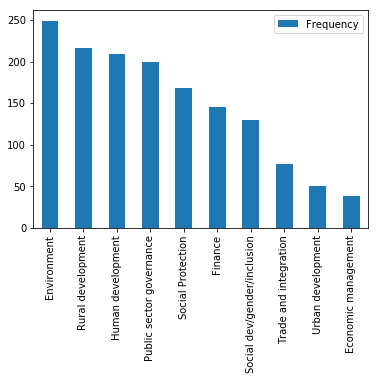

In [16]:
# Visualize the frequency of the major themes in a bar graph

theme_ranking = theme_ranking.rename({'Environment and natural resources management': 'Environment', 
                      'Social protection and risk management': 'Social Protection',
                     'Financial and private sector development': 'Finance'})
theme_ranking.plot(kind='bar').set_xlabel('')

In [17]:
# Count the empty name rows before starting Exercise #3 to confirm that some major_theme names are still missing

bank_data = pd.read_json('data/world_bank_projects.json')
bank_data['mjtheme_namecode'] = bank_data['mjtheme_namecode'].apply(json_normalize)

missing_count = 0
for row in range(1, 500):
    for i in range(0, len(bank_data['mjtheme_namecode'][row].index)):
        missing_count = missing_count + (bank_data['mjtheme_namecode'][row]['name'][i] == "")
missing_count

121

In [18]:
# Define a function for Exercise #3 that automatically fills in all major_theme names in a cell based on the decoder dictionary

def replace_all(cell):
    cell = json_normalize(cell)
    for i in cell.index:
        cell.loc[i, 'name'] = decoder[cell.loc[i, 'code']]
    return cell

In [19]:
# Use the replace_all function to fill in all of the missing major_theme names for Exercise #3
bank_data = pd.read_json('data/world_bank_projects.json')
bank_data['mjtheme_namecode'] = bank_data['mjtheme_namecode'].apply(replace_all)
bank_data

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{u'$oid': u'52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{u'Percent': 46, u'Name': u'Regional integrati...","[{u'code': u'47', u'name': u'Regional integrat...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{u'$oid': u'52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{u'Percent': 50, u'Name': u'Participation and ...","[{u'code': u'57', u'name': u'Participation and...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{u'$oid': u'52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Export development...","[{u'code': u'45', u'name': u'Export developmen...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...
5,{u'$oid': u'52b213b38594d8a2be17c785'},2014,October,2013-10-31T00:00:00Z,REPUBLIC OF KENYA,NaN,Republic of Kenya!$!KE,KE,Republic of Kenya,Kenya,...,JB,IBRD,Active,Y,"{u'Percent': 100, u'Name': u'Social safety nets'}","[{u'code': u'54', u'name': u'Social safety net...",54,10000000,10000000,http://www.worldbank.org/projects/P146161?lang=en
6,{u'$oid': u'52b213b38594d8a2be17c786'},2014,October,2013-10-29T00:00:00Z,GOVERNMENT OF INDIA,2019-06-30T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{u'Percent': 20, u'Name': u'Administrative and...","[{u'code': u'25', u'name': u'Administrative an...","39,25",500000000,500000000,http://www.worldbank.org/projects/P121185/firs...
7,{u'$oid': u'52b213b38594d8a2be17c787'},2014,October,2013-10-29T00:00:00Z,PEOPLE'S REPUBLIC OF CHINA,NaN,People's Republic of China!$!CN,CN,People's Republic of China,China,...,LR,IBRD,Active,N,"{u'Percent': 100, u'Name': u'Climate change'}","[{u'code': u'81', u'name': u'Climate change'}]",81,0,27280000,http://www.worldbank.org/projects/P127033/chin...
8,{u'$oid': u'52b213b38594d8a2be17c788'},2014,October,2013-10-29T00:00:00Z,THE GOVERNMENT OF INDIA,2018-12-31T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{u'Percent': 87, u'Name': u'Other rural develo...","[{u'code': u'79', u'name': u'Other rural devel...",79,160000000,160000000,http://www.worldbank.org/projects/P130164/raja...
9,{u'$oid': u'52b213b38594d8a2be17c789'},2014,October,2013-10-29T00:00:00Z,THE KINGDOM OF MOROCCO,2014-12-31T00:00:00Z,Kingdom of Morocco!$!MA,MA,Kingdom of Morocco,Morocco,...,"BM,BC,BZ",IBRD,Active,N,"{u'Percent': 33, u'Name': u'Other accountabili...","[{u'code': u'29', u'name': u'Other accountabil...","27,30,29",200000000,200000000,http://www.worldbank.org/projects/P130903?lang=en


In [20]:
# 'Zoom in' on the mjtheme_namecode column to confirm that all major_theme names have been successfully replaced

for row in range(1,500):
    print(bank_data['mjtheme_namecode'][row])

  code                                   name
0    1                    Economic management
1    6  Social protection and risk management
  code                                          name
0    5                         Trade and integration
1    2                      Public sector governance
2   11  Environment and natural resources management
3    6         Social protection and risk management
  code                         name
0    7  Social dev/gender/inclusion
1    7  Social dev/gender/inclusion
  code                                      name
0    5                     Trade and integration
1    4  Financial and private sector development
  code                                   name
0    6  Social protection and risk management
1    6  Social protection and risk management
  code                                      name
0    2                  Public sector governance
1    4  Financial and private sector development
  code                                          name
0   

  code                                          name
0   11  Environment and natural resources management
  code                                   name
0    8                      Human development
1    8                      Human development
2    2               Public sector governance
3    5                  Trade and integration
4    6  Social protection and risk management
  code                                          name
0   11  Environment and natural resources management
1   11  Environment and natural resources management
  code                                      name
0    4  Financial and private sector development
1    5                     Trade and integration
  code                                          name
0   11  Environment and natural resources management
1    2                      Public sector governance
2    2                      Public sector governance
3    2                      Public sector governance
  code                                         

  code               name
0    8  Human development
1    9  Urban development
  code                      name
0    8         Human development
1    2  Public sector governance
  code                                          name
0   11  Environment and natural resources management
1   11  Environment and natural resources management
  code               name
0    8  Human development
1    8  Human development
2    8  Human development
3    8  Human development
4    8  Human development
  code                                          name
0   11  Environment and natural resources management
1    9                             Urban development
  code                                          name
0   11  Environment and natural resources management
1   11  Environment and natural resources management
2   11  Environment and natural resources management
  code                                          name
0    2                      Public sector governance
1   11  Environment and natural

  code                                   name
0    6  Social protection and risk management
1    8                      Human development
2    6  Social protection and risk management
3    8                      Human development
4    8                      Human development
  code                         name
0    7  Social dev/gender/inclusion
1   10            Rural development
  code                         name
0    7  Social dev/gender/inclusion
1    8            Human development
  code               name
0    8  Human development
1    8  Human development
  code                                   name
0    6  Social protection and risk management
1    8                      Human development
2    7            Social dev/gender/inclusion
  code                                          name
0   11  Environment and natural resources management
1   11  Environment and natural resources management
2   11  Environment and natural resources management
3    5                         Tra

  code                                   name
0    6  Social protection and risk management
1    6  Social protection and risk management
2    6  Social protection and risk management
3    1                    Economic management
  code                      name
0    8         Human development
1    2  Public sector governance
2    2  Public sector governance
3    2  Public sector governance
  code                   name
0    8      Human development
1    5  Trade and integration
  code               name
0    8  Human development
1   10  Rural development
  code                   name
0    5  Trade and integration
1    5  Trade and integration
  code               name
0    8  Human development
1    8  Human development
2    8  Human development
3    8  Human development
4    8  Human development
  code                                   name
0    6  Social protection and risk management
1    9                      Urban development
2    7            Social dev/gender/inclusion
  code 

  code                                          name
0    6         Social protection and risk management
1   11  Environment and natural resources management
2   11  Environment and natural resources management
  code                                          name
0    7                   Social dev/gender/inclusion
1   11  Environment and natural resources management
  code                                          name
0   11  Environment and natural resources management
1   11  Environment and natural resources management
  code                 name
0    1  Economic management
1    1  Economic management
  code                                      name
0    2                  Public sector governance
1    2                  Public sector governance
2   10                         Rural development
3    8                         Human development
4    4  Financial and private sector development
  code                                          name
0   11  Environment and natural resourc

  code                                          name
0   11  Environment and natural resources management
1   10                             Rural development
2   11  Environment and natural resources management
3    6         Social protection and risk management
  code                                   name
0    1                    Economic management
1    1                    Economic management
2    2               Public sector governance
3    2               Public sector governance
4    6  Social protection and risk management
  code                                   name
0    2               Public sector governance
1    1                    Economic management
2    6  Social protection and risk management
  code                                   name
0    6  Social protection and risk management
1    6  Social protection and risk management
  code                                   name
0    6  Social protection and risk management
1    6  Social protection and risk management

  code                                   name
0    2               Public sector governance
1    6  Social protection and risk management
2   10                      Rural development
3    7            Social dev/gender/inclusion
4    2               Public sector governance
  code                                   name
0    5                  Trade and integration
1    8                      Human development
2    6  Social protection and risk management
  code                         name
0   10            Rural development
1   10            Rural development
2    7  Social dev/gender/inclusion
  code                                          name
0   11  Environment and natural resources management
1    6         Social protection and risk management
2   11  Environment and natural resources management
3    7                   Social dev/gender/inclusion
4    2                      Public sector governance
  code                                      name
0    2                  Publi

In [21]:
# Count the empty name rows to confirm that all major_theme names have been successfully replaced

still_missing_count = 0
for row in range(1, 500):
    for i in range(0, len(bank_data['mjtheme_namecode'][row].index)):
        still_missing_count = still_missing_count + (bank_data['mjtheme_namecode'][row]['name'][i] == "")
still_missing_count

0

In [22]:
# Count the total number of codes in the database and visualize the data quality of the original dataset

total_count = 0
for row in range(1, 500):
    for i in range(0, len(bank_data['mjtheme_namecode'][row].index)):
        total_count = total_count + 1
total_count


1497

In [23]:
healthy_count = total_count - missing_count
healthy_count

1376

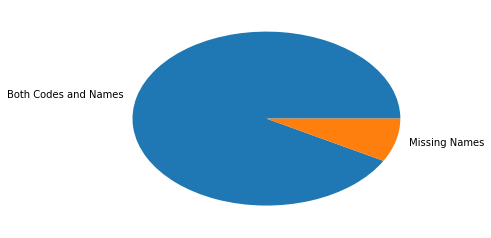

In [24]:
data_quality = pd.Series([healthy_count, missing_count])
data_quality.index=['Both Codes and Names', 'Missing Names']
data_quality.plot(kind='pie', label='')